In [1]:
#importing Libraries
import pandas as pd
import numpy as np

#importing Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loding train Dataset
ds1=pd.read_excel('train_agriculture.xlsx')
ds1=pd.DataFrame(ds1)
ds_tr=ds1.copy()

#Loding test Dataset
ds2=pd.read_excel('test_agriculture.xlsx')
ds2=pd.DataFrame(ds2)
ds_te=ds2.copy()

In [3]:
#looking at dataset

print(ds_tr.shape)
ds_tr.head()

(4599, 10)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#checking ID Feature
np.unique(ds_tr['ID'].values)

array(['F00000001', 'F00000003', 'F00000004', ..., 'F00008080',
       'F00008082', 'F00008083'], dtype=object)

In [5]:
#Unique value of categorical feature
print(np.unique(ds_tr['Crop_Type'].values))
print(np.unique(ds_tr['Soil_Type'].values))
print(np.unique(ds_tr['Pesticide_Use_Category'].values))
print(ds_tr['Number_Doses_Week'].values)
print(np.unique(ds_tr['Season'].values))

[0 1]
[0 1]
[1 2 3]
[ 0  0  0 ... 10 10 10]
[1 2 3]


In [6]:
#describing data
ds_tr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


# Null Values

In [7]:
#Checking Null Values

#Train Data
print('Train')
print(ds_tr.isnull().sum())
print()

#Test Data
print('Test')
print(ds_te.isnull().sum())

Train
ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Test
ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64


we see there is a missing vaule in Number_Weeks_Used, we can replace it with mean

In [8]:
#Replacing NaN value in both datasets

#Train
ds_tr['Number_Weeks_Used'] = ds_tr.Number_Weeks_Used.fillna(ds_tr.Number_Weeks_Used.mean())

#Test
ds_te['Number_Weeks_Used'] = ds_te.Number_Weeks_Used.fillna(ds_te.Number_Weeks_Used.mean())

In [9]:
#Dropping Unnecessary Columns

#Train
ds_tr=ds_tr.drop(['ID'],axis=1)

#Test
ds_te=ds_te.drop(['ID'],axis=1)

# Exploratory Data Analysis

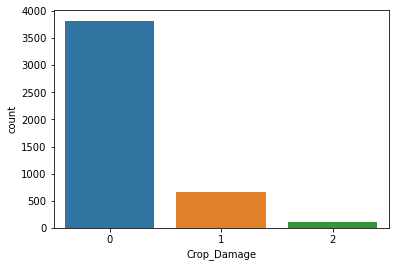

In [10]:
#Checking the distribution target variable whether its balanced or imbalanced
sns.countplot(ds_tr['Crop_Damage'])

it's an imbalanced classification problem, This suggest accuracy is not a better model evaluation metric. 

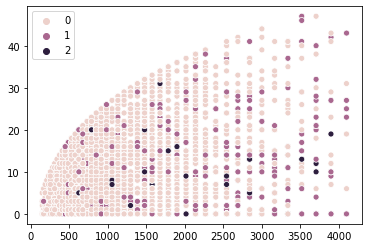

In [11]:
#plotting Estimated_Insects_Count vs. Number_Weeks_Quit
sns.scatterplot(x=ds_tr['Estimated_Insects_Count'].values,y=ds_tr['Number_Weeks_Quit'].values,hue=ds_tr['Crop_Damage'].values)

Observation - 
1. As the weeks with no pesticide increases then insect count also increased

2. With the increment in insect_count damage is also increased

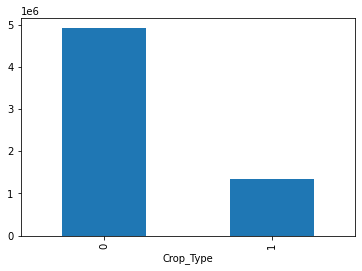

In [12]:
# Plotting Crop with more insects
ds_tr.groupby('Crop_Type')['Estimated_Insects_Count'].sum().plot(kind='bar')

We see that crop 0 has more insect hence need more pestiside

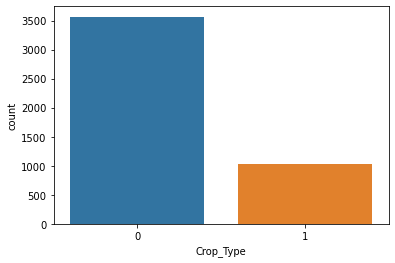

In [13]:
#Checking the distribution of crop type
sns.countplot(ds_tr['Crop_Type'])

Crop 0 has more number of observation

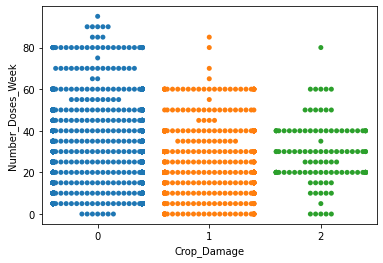

In [14]:
sns.swarmplot(y='Number_Doses_Week' , x='Crop_Damage', data=ds_tr)

as usage per week increases damage desreases

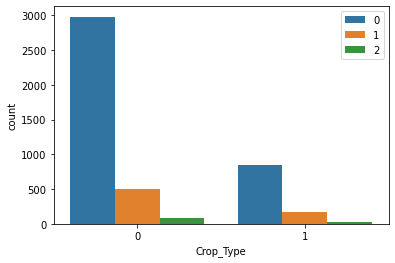

In [15]:
#crop damage on crop type
sns.countplot(x='Crop_Type',data=ds_tr,hue='Crop_Damage')
plt.legend()

We see that crop 1 is more damaged as ratio of 0:1 & 1:2 is high 

Hence, crop 1 require more pestiside

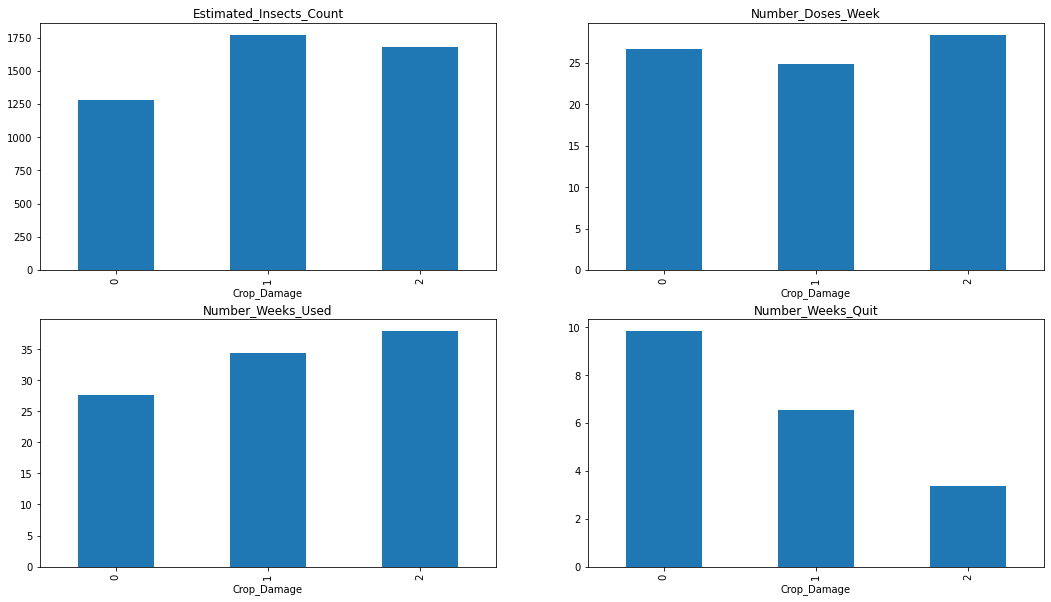

In [16]:
#Plotting distrubtion of various mumeric feature
numeric = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']

plt.figure(1)
splot = 221
for col in numeric:
    plt.subplot(splot)
    ds_tr.groupby('Crop_Damage')[col].mean().plot.bar(figsize = (18,10),title = col)
    splot += 1

Observation

1. Damage type 1 is more because of insect

2. When Number of dosage per week is around 25 crop performed best

3. Number of week increses damage also increses

4. Quiting pestiside decreases damage

Text(0.5, 1.0, 'Pesticide_Use_Category')

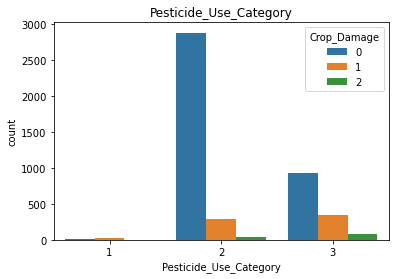

In [17]:
#Plotting countplot of Pesticide_Use_Category
sns.countplot(ds_tr['Pesticide_Use_Category'], hue=ds_tr['Crop_Damage'])
plt.title("Pesticide_Use_Category")

Most of the farmer quit using pesticide

with leaving the use of pesticide damage decreases

Text(0.5, 1.0, 'Season')

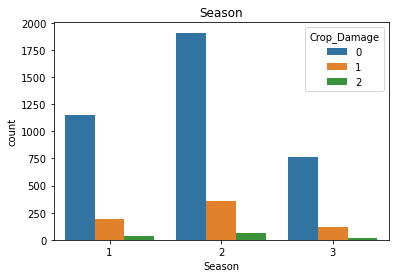

In [18]:
#Plotting countplot of season
sns.countplot(ds_tr['Season'], hue=ds_tr['Crop_Damage'])
plt.title("Season")

Most the observation are from season 2 but when we analyze the ratio we see the decrement of damage in season 2 but increment in season 1

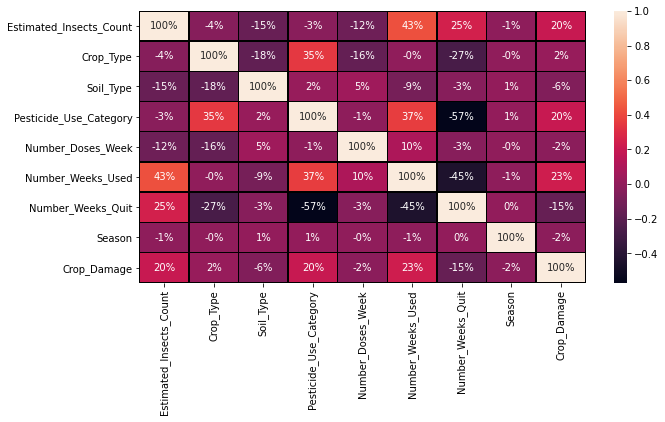

In [19]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(ds_tr.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.0%')

High Correlation with sales = Insect count, Use Catagory, Number of week used

Mild Correlation with sales = Crop type

Low Correlation with sales = Soil Type, Number of Dosage per week, Number of Week Quit, Season

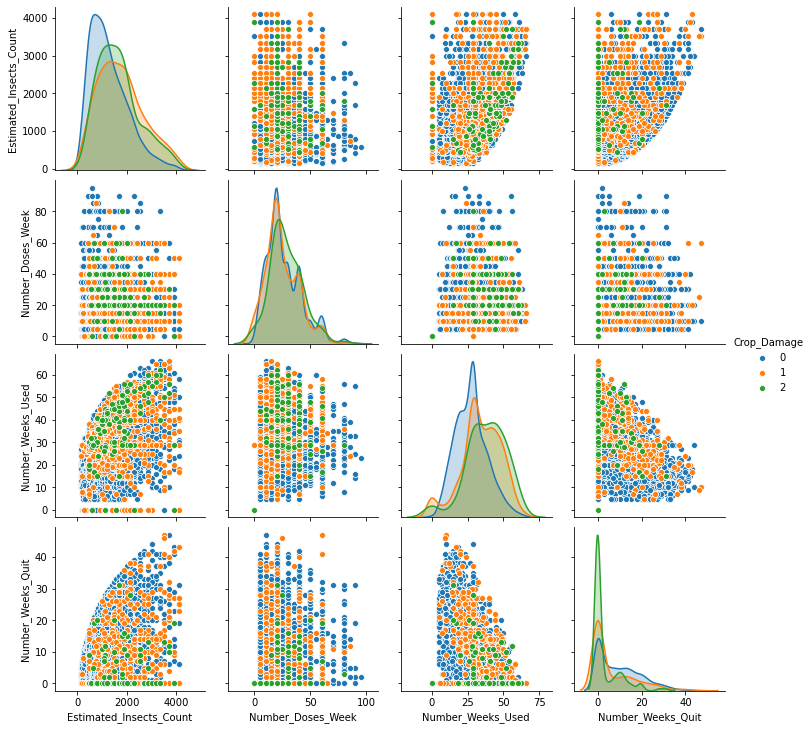

In [20]:
#Pair Plot to see relation
sns.pairplot(ds_tr , hue= 'Crop_Damage' ,vars=['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit' ])

# Outliers

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

<Figure size 864x432 with 0 Axes>

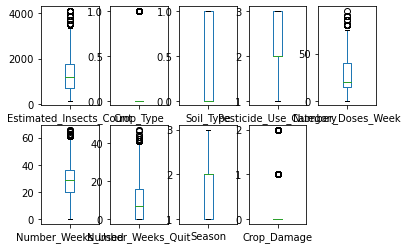

In [21]:
#Plotting Boxplot to see Outliers

#Training Datasets
plt.figure(figsize=(12,6))
ds_tr.plot(kind='box', subplots=True, layout=(2,5))

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

<Figure size 864x432 with 0 Axes>

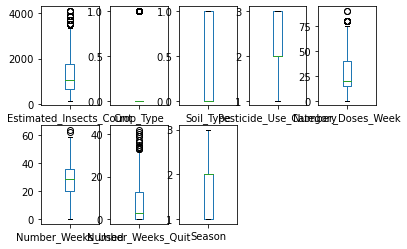

In [22]:
#Testing Datasets
plt.figure(figsize=(12,6))
ds_te.plot(kind='box', subplots=True, layout=(2,5))

# Removing Outliers

In [23]:
#importing Zscore Library
from scipy import stats
from scipy.stats import zscore

#Applying Zscore to the columns with outliers
z1=abs(zscore(ds_tr))
z2=abs(zscore(ds_te))

#printing all the data with zscore is greater than 3
print(np.where(z1>3))
print(np.where(z2>3))

threshold=3

#removing all the rows having zscore greater than 3
ds_tr=ds_tr[(z1<3).all(axis=1)]
ds_te=ds_te[(z2<3).all(axis=1)]

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

Outliers Removed

# Skewness

In [24]:
#Checking Skewness

#Train Data
print('Train')
print(ds_tr.skew())
print()

#Test Data
print('Test')
print(ds_te.skew())

Train
Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

Test
Estimated_Insects_Count    1.013185
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week          0.645208
Number_Weeks_Used          0.223826
Number_Weeks_Quit          1.032108
Season                     0.159728
dtype: float64


In [25]:
#removing Skewness

#Training dataset
l1=['Crop_Type','Crop_Damage']
for i in l1:
    ds_tr[i]=np.sqrt(ds_tr[i])
    
#Testing dataset
l2=['Estimated_Insects_Count','Crop_Type','Number_Weeks_Quit']
for i in l2:
    ds_te[i]=np.sqrt(ds_te[i])

# Model Building

# Standard Scaling

In [26]:
#Normalising
from sklearn.preprocessing import StandardScaler

#Making X and Y variables
X=ds_tr.iloc[:,:-1]
Y=ds_tr.iloc[:,-1:]

#Standard Scaling
sc=StandardScaler()
X=sc.fit_transform(X)

# Oversampling

As we see that data is less and we don't want to lose any valuble information so we are oversampling

In [27]:
#Importing Library
from imblearn.over_sampling import SMOTE

#Implementing Oversampling for Handeling Imbalance
smo=SMOTE(random_state=42)
x,y=smo.fit_sample(X,Y)

# Selection Of Model

In [28]:
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [29]:
#testing Different Models
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), KNeighborsClassifier(),GaussianNB() ]

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print('roc_auc_score')
    print(roc_auc_score(y_test,pred))
    print(i, 'score')
    print(i.score(x_train,y_train))
    print('confusion_matrix')
    print(confusion_matrix(y_test,pred))
    print('classification_report')
    print(classification_report(y_test,pred))
    
    print()
    print('..................................................................................................................')

LogisticRegression()
roc_auc_score
0.6794973492747745
LogisticRegression() score
0.684871837828782
confusion_matrix
[[538 216]
 [262 477]]
classification_report
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       754
         1.0       0.69      0.65      0.67       739

    accuracy                           0.68      1493
   macro avg       0.68      0.68      0.68      1493
weighted avg       0.68      0.68      0.68      1493


..................................................................................................................
SVC()
roc_auc_score
0.7488899975951443
SVC() score
0.7533925280616519
confusion_matrix
[[560 194]
 [181 558]]
classification_report
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       754
         1.0       0.74      0.76      0.75       739

    accuracy                           0.75      1493
   macro avg       0.75      0.75      0.75   

Here we see that best performing model is KNeighbors so we will proceed with it

# HyperParameter Tuning

In [30]:
#Grid Search 
knn_para= {'n_neighbors': range(1,20)}

gd=GridSearchCV( estimator=KNeighborsClassifier() ,param_grid=knn_para ,scoring='roc_auc' ,cv=5)
gd.fit(x,y)
best_para= gd.best_params_
best_score=gd.best_score_
print(best_para)
print(best_score)

{'n_neighbors': 3}
0.8036188175232055


In [31]:
#Finding best random score
max_ac_score=0
knn=KNeighborsClassifier (n_neighbors= 3)
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.20)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    acc_score=roc_auc_score(y_test,pred)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_rs=r_state
print('max auc_roc score corrosponding to' ,final_rs ,'is', max_ac_score)

max auc_roc score corrosponding to 77 is 0.8503173483779971


# Model

In [32]:
# Calling Model
knn=KNeighborsClassifier (n_neighbors= 3)

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=77, test_size=0.20)

#fitting Train data in model
knn.fit(x_train,y_train)

#Predecting Values
pred=knn.predict(x_test)

#printing Matrics
print(knn.score(x_train,y_train))
print(roc_auc_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9065170045233707
0.8503173483779971
[[588 196]
 [ 35 674]]
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84       784
         1.0       0.77      0.95      0.85       709

    accuracy                           0.85      1493
   macro avg       0.86      0.85      0.84      1493
weighted avg       0.86      0.85      0.84      1493



# Ensembel Technique

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier


rd=RandomForestClassifier(n_estimators=20)
#fitting Train data in model
rd.fit(x_train,y_train)

#Predecting Values
pred=rd.predict(x_test)

#printing Matrics
print(rd.score(x_train,y_train))
print(roc_auc_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9969844195007539
0.8890360093261563
[[704  80]
 [ 85 624]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       784
         1.0       0.89      0.88      0.88       709

    accuracy                           0.89      1493
   macro avg       0.89      0.89      0.89      1493
weighted avg       0.89      0.89      0.89      1493



In [34]:
#testing Different Models
model=[RandomForestClassifier(), AdaBoostClassifier() , GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier() ]

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print('roc_auc_score')
    print(roc_auc_score(y_test,pred))
    print( 'Model score')
    print(i.score(x_train,y_train))
    print('confusion_matrix')
    print(confusion_matrix(y_test,pred))
    print('classification_report')
    print(classification_report(y_test,pred))
    
    print()
    print('..................................................................................................................')

RandomForestClassifier()
roc_auc_score
0.8787889936576418
Model score
0.9996649355000837
confusion_matrix
[[661  93]
 [ 88 651]]
classification_report
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       754
         1.0       0.88      0.88      0.88       739

    accuracy                           0.88      1493
   macro avg       0.88      0.88      0.88      1493
weighted avg       0.88      0.88      0.88      1493


..................................................................................................................
AdaBoostClassifier()
roc_auc_score
0.7608263371176907
Model score
0.7786898978053275
confusion_matrix
[[578 176]
 [181 558]]
classification_report
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76       754
         1.0       0.76      0.76      0.76       739

    accuracy                           0.76      1493
   macro avg       0.76      0.76      0.

In [35]:
#Grid Search 
para= {'n_estimators': [100] , 'criterion': ['gini' , 'entropy'], 'random_state': range(1,100)}

gd=GridSearchCV( estimator=ExtraTreesClassifier() ,param_grid=para ,scoring='roc_auc' ,cv=5)
gd.fit(x,y)
best_para= gd.best_params_
best_score=gd.best_score_
print(best_para)
print(best_score)

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 74}
0.9120205203701672


# Final Model

In [38]:
#calling Model
ed=RandomForestClassifier(n_estimators=100, criterion= 'entropy' )

#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=74, test_size=0.20)

#fitting Train data in model
ed.fit(x_train,y_train)

#Predecting Values
pred=ed.predict(x_test)

#printing Matrics
print(ed.score(x_train,y_train))
print(roc_auc_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9993298710001676
0.899439677657259
[[695  88]
 [ 63 647]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       783
         1.0       0.88      0.91      0.90       710

    accuracy                           0.90      1493
   macro avg       0.90      0.90      0.90      1493
weighted avg       0.90      0.90      0.90      1493



# Roc Auc Curve

Text(0.5, 1.0, 'ROC curve')

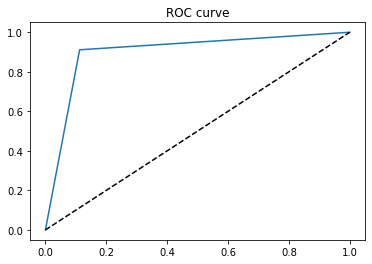

In [43]:
from sklearn.metrics import roc_curve
y_pred_prob=ed.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve')

In [44]:
#Cross Valadation
from sklearn.model_selection import cross_val_score
cross_val_score(ed,x,y,cv=5).mean()

0.8145237201668554

In [47]:
#givig test value to final model
pred_crop=ed.predict(ds_te)

# Saving

In [49]:
#Saving Predicted file in CSV
df=pd.DataFrame(pred_crop)
df.to_csv('predict_crop.csv')

In [51]:
import joblib
joblib.dump(ed,"crop.pkl")

['crop.pkl']